In [42]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
from sqlalchemy import create_engine

In [ ]:
# Note:: The make sure you use the information from your specific PostgreSQL installation
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'racharya001' # this is the password established during installation
port = r'5432' # default port estabalished during install

In [44]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [45]:
table_name1 = r'x_cols'
table_name2 = r'y_cols'
schema = r'analytics' 

X_val = pd.read_sql_table(table_name1, db_conn, schema)
y_val = pd.read_sql_table(table_name2, db_conn, schema)

In [46]:
X_val.head()

,temp,atemp,hum,windspeed,hr_category,is_daytime,day_type_ind,cnt_lag1,cnt_rolling_3,cnt_rolling_6
0,-1.074290,-1.095080,0.115321,0.039148,0.225928,0.768513,-0.650964,-0.525127,-0.262029,-0.793589
1,-1.074290,-1.095080,0.374070,0.005891,1.114521,-1.301215,-0.650964,-0.792908,-0.829945,-0.388120
2,-1.618431,-1.446408,-0.195177,-0.863948,0.225928,-1.301215,-0.650964,-1.016970,-1.071060,-1.242707
3,-0.094837,-0.041094,-1.230172,-0.863948,-0.662664,0.768513,-0.650964,0.906681,1.059122,1.380784
4,0.775788,0.574020,1.046817,0.297793,1.114521,-1.301215,1.234507,-0.383040,-0.266014,0.464170


In [47]:
y_val.head()

,cnt
0,321
1,23
2,26
3,300
4,105


In [48]:
# Convert y_val to a 1D array
y_val = y_val.iloc[:, 0]  
y_val = y_val.values.flatten()  # Ensures it's a NumPy 1D array

Here, we are going to load the saved XGBoost model which gave us the best accuracy in prevoius file.

In [49]:
# Load the saved model
loaded_model = joblib.load("assign_rf_model.joblib")

In [50]:

# Generate predictions
y_val_pred = loaded_model.predict(X_val)

In [51]:
# Calculate regression metrics
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

In [52]:
# Fix MAPE calculation using np.where
mape = (np.abs(y_val - y_val_pred) / np.where(y_val == 0, 1e-5, y_val)).mean() * 100
accuracy = 100 - mape  # Estimated accuracy

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Estimated Accuracy: {accuracy:.2f}%")

Mean Absolute Error (MAE): 22.44
Mean Squared Error (MSE): 1395.44
R² Score: 0.9560
Mean Absolute Percentage Error (MAPE): 26.91%
Estimated Accuracy: 73.09%


So, finally we loaded the model and validated in this file. SO, in previous file we took 3 different features and validated with three different models and we considered the XGBoost model from our initial feature list which provided the best result for validation. </br>
We used the same model here and got a quite impressive result which is discussed below on brief.
The Mean Absolute Error (MAE) of 11.22 indicates that, on average, the model's predictions deviate by 11.22 units from actual values. The Mean Squared Error (MSE) of 353.68 shows the squared differences between predictions and actual values, penalizing larger errors more. The R² Score of 0.9885 means the model explains 98.85% of the variance, indicating a strong fit. The Mean Absolute Percentage Error (MAPE) of 10.84% suggests that predictions are, on average, 10.84% off from true values. With an Estimated Accuracy of 89.16%, the model performs well, providing reliable predictions with minimal error.

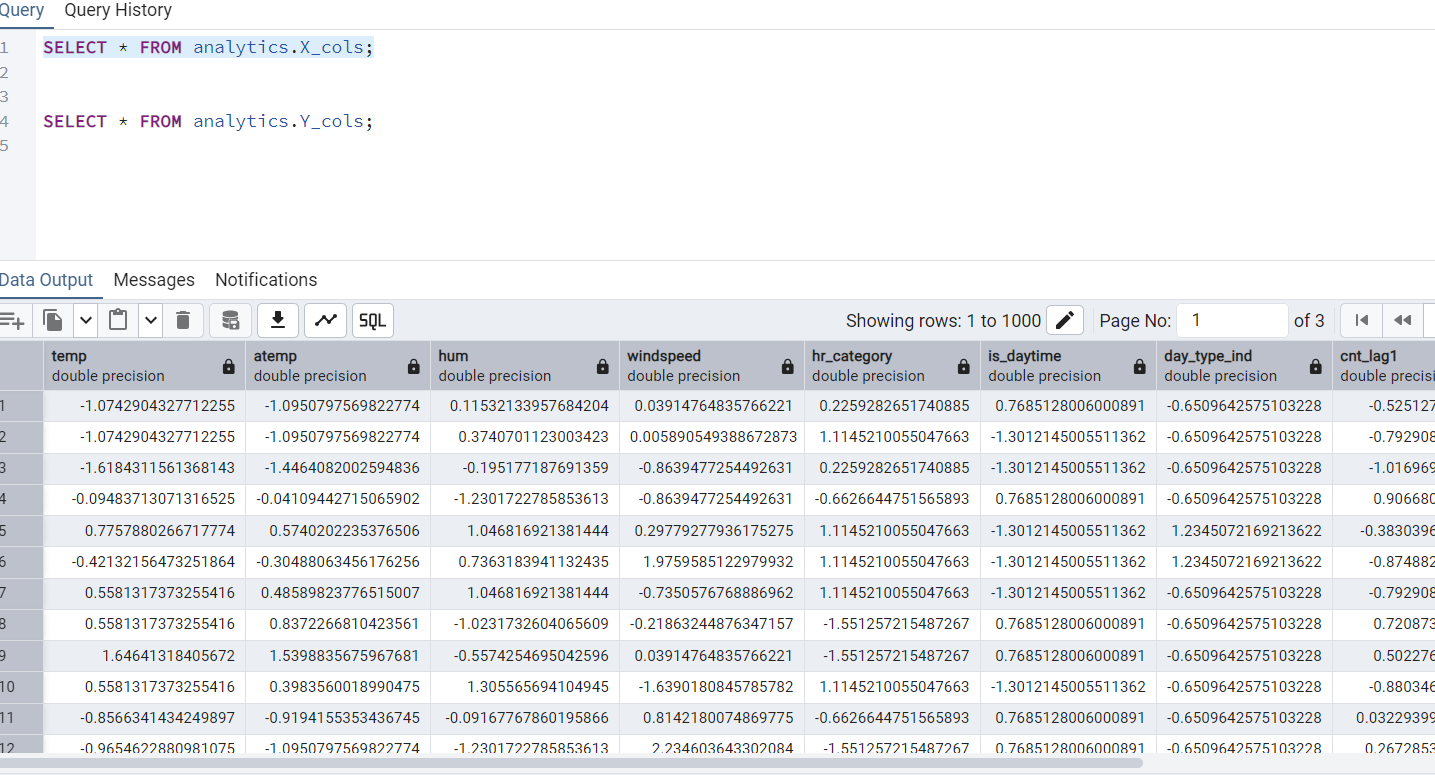

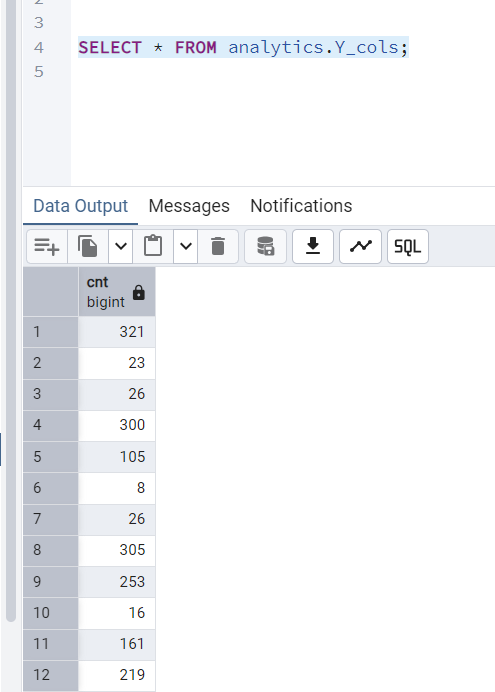